In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Номер 1

In [44]:
df = pd.read_csv('archive.zip')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Номер 2

In [45]:
print(df.shape)  #размерность данных
print("-"*20)
print(df.dtypes)  #Типы переменных в данных
print("-"*20)
df = df.dropna()  #есть ли пропуски в данных? если да, то удалите их
df

(178, 14)
--------------------
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object
--------------------


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


Номер 3

In [66]:
X = df.loc[:,['Flavanoids', 'OD280']]
Y = df['Customer_Segment']
#как по мне, именно от этих признаков зависит Customer_Segment

Номер 4

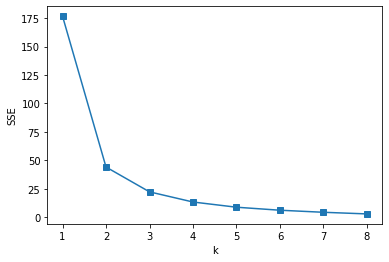

In [64]:
from sklearn.cluster import KMeans
SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()
#Я выбрал 3, так как оно оптимально, после 3 не слишком большая разница

Номер 5

In [98]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

Y_pred = kmeans.labels_
Y_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1,
       1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

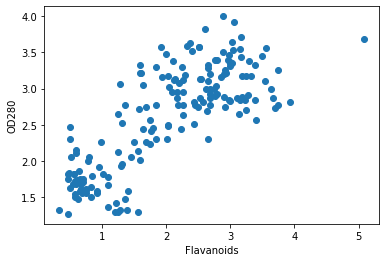

In [99]:
plt.scatter(df['Flavanoids'],df['OD280'])
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.show()

In [100]:
X['cluster'] = Y_pred
X

,Flavanoids,OD280,cluster
0,3.06,3.92,1
1,2.76,3.40,1
2,3.24,3.17,1
3,3.49,3.45,1
4,2.69,2.93,1
...,...,...,...
173,0.61,1.74,0
174,0.75,1.56,0
175,0.69,1.56,0
176,0.68,1.62,0


Номер 6

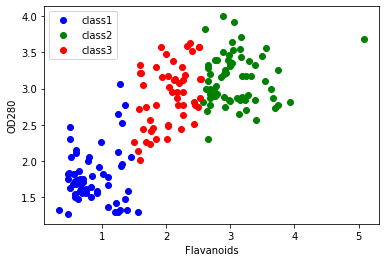

In [101]:
plt.plot(X[X['cluster']==0]['Flavanoids'], X[X['cluster']==0]['OD280'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['Flavanoids'], X[X['cluster']==1]['OD280'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['Flavanoids'], X[X['cluster']==2]['OD280'], 'ro', label='class3')

plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.legend(loc=0)
plt.show()